# Exploratory Data Analysis and Pricing Model Challenge

Welcome to this data science challenge focused on exploratory data analysis (EDA) and pricing model development for short-term rentals in New York City! The goal of this challenge is to test your skills in solving real-world business problems, applying statistical concepts, and utilizing machine learning for predictive analysis.

#### **Dataset: teste_indicium_precificacao**

## Objectives:

The primary objectives of this challenge encompass:

1. **Exploratory Data Analysis (EDA):**
   - Uncover key insights and relationships within the dataset through exploratory data analysis.
   - Formulate business hypotheses based on the data's main characteristics.

2. **Specific Questions:**
   - Address specific questions related to real estate investment and rental pricing.
     - Identify suitable locations for property investment.
     - Explore the impact of minimum nights and annual availability on pricing.
     - Investigate patterns in the textual names of locations.

3. **Pricing Model Development:**
   - Develop a predictive pricing model using machine learning techniques.
   - Evaluate the model's performance using relevant metrics.

4. **Deliverables:**
   - Present results and findings in a public code repository:
     - README with installation and execution instructions.
     - Requirements file with library dependencies and versions.
     - Statistical analysis and EDA reports in PDF or Jupyter Notebook format.
     - Model development code.
     - Save the developed model in a .pkl file.

5. **Coding Best Practices:**
   - Adhere to coding best practices to ensure clarity, efficiency, and maintainability.

## Submission Deadline:

You have a timeframe of 7 consecutive days (21/02/2024) from the receipt of this challenge to submit your completed notebook.


#Import Libraries

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud
import spacy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from datetime import datetime


In [299]:
!pip install spacy
!python -m spacy download en_core_web_md
nltk.download('stopwords')
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load the Dataset

In [300]:
df = pd.read_csv('/content/drive/MyDrive/teste_indicium_precificacao.csv')

In [301]:
# @title Dataframe Deep
df.head(-5)

id                                               nome    host_id  \
0          2595                              Skylit Midtown Castle       2845   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
2          3831                    Cozy Entire Floor of Brownstone       4869   
3          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
4          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                                ...        ...   
48884  36482809    Stunning Bedroom NYC! Walking to Central Park!!  131529729   
48885  36483010                    Comfy 1 Bedroom in Midtown East  274311461   
48886  36483152    Garden Jewel Apartment in Williamsburg New York  208514239   
48887  36484087  Spacious Room w/ Private Rooftop, Central loca...  274321313   
48888  36484363                                 QUIT PRIVATE HOUSE  107716952   

         host_name bairro_group          bairro  latitude  longitude  \
0         Jennifer    Manhattan         Midtown  40.75362  -73.98377   
1        Elisabeth    Manhattan          Harlem  40.80902  -73.94190   
2      LisaRoxanne     Brooklyn    Clinton Hill  40.68514  -73.95976   
3            Laura    Manhattan     East Harlem  40.79851  -73.94399   
4            Chris    Manhattan     Murray Hill  40.74767  -73.97500   
...            ...          ...             ...       ...        ...   
48884      Kendall    Manhattan     East Harlem  40.79633  -73.93605   
48885        Scott    Manhattan         Midtown  40.75561  -73.96723   
48886        Melki     Brooklyn    Williamsburg  40.71232  -73.94220   
48887          Kat    Manhattan  Hell's Kitchen  40.76392  -73.99183   
48888      Michael       Queens         Jamaica  40.69137  -73.80844   

             room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0      Entire home/apt    225              1                 45    2019-05-21   
1         Private room    150              3                  0           NaN   
2      Entire home/apt     89              1                270    2019-07-05   
3      Entire home/apt     80             10                  9    2018-11-19   
4      Entire home/apt    200              3                 74    2019-06-22   
...                ...    ...            ...                ...           ...   
48884     Private room     75              2                  0           NaN   
48885  Entire home/apt    200              6                  0           NaN   
48886  Entire home/apt    170              1                  0           NaN   
48887     Private room    125              4                  0           NaN   
48888     Private room     65              1                  0           NaN   

       reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0                 0.38                              2                  355  
1                  NaN                              1                  365  
2                 4.64                              1                  194  
3                 0.10                              1                    0  
4                 0.59                              1                  129  
...                ...                            ...                  ...  
48884              NaN                              2                  353  
48885              NaN                              1                  176  
48886              NaN                              3                  365  
48887              NaN                              1                   31  
48888              NaN                              2                  163  

[48889 rows x 16 columns]

In [302]:
# @title Rename colunm titles

translation_dict = {
    'id': 'id',
    'nome': 'name',
    'host_id': 'host_id',
    'host_name': 'host_name',
    'bairro_group': 'neighbourhood_group',
    'bairro': 'neighbourhood',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'room_type': 'room_type',
    'price': 'price',
    'minimo_noites': 'minimum_nights',
    'numero_de_reviews': 'number_of_reviews',
    'ultima_review': 'last_review',
    'reviews_por_mes': 'reviews_per_month',
    'calculado_host_listings_count': 'calculated_host_listings_count',
    'disponibilidade_365': 'availability_365'
}

df.rename(columns=translation_dict, inplace=True)

In [303]:
# @title Dataframe Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48894 non-null  int64  
 1   name                            48878 non-null  object 
 2   host_id                         48894 non-null  int64  
 3   host_name                       48873 non-null  object 
 4   neighbourhood_group             48894 non-null  object 
 5   neighbourhood                   48894 non-null  object 
 6   latitude                        48894 non-null  float64
 7   longitude                       48894 non-null  float64
 8   room_type                       48894 non-null  object 
 9   price                           48894 non-null  int64  
 10  minimum_nights                  48894 non-null  int64  
 11  number_of_reviews               48894 non-null  int64  
 12  last_review                     

## Descriptive statistics

Now, I want to calculate descriptive statistics for the numerical variables to understand the distribution of the data, such as mean, standard deviation, minimum and maximum values.

1. **Number of Records (count)**: The number of records is the same for most attributes, which is good, as it indicates consistency in the dataset. However, reviews_per_month has fewer counts, which means there are missing values ​​in that column.

2. **Mean**: The mean can give an idea of ​​the "typical" value for each attribute, but can be influenced by outliers. For example, the average price is $152.72, which tells us the average listing price.

3. **Standard Deviation (std)**: Standard deviation shows the amount of variation or dispersion in the data. For example, the standard deviation of the price is $240.15, which suggests significant variation in listing prices.

4. **Minimum and Maximum Values ​​(min and max)**: These values ​​help to identify the scope of the data. For example, the maximum price of $10,000 may be an outlier that needs to be investigated as it is much higher than the average.

5. **Quartiles (25%, 50%, 75%)**: Quartiles tell us about the distribution of the data. The 50% (median) is less sensitive to outliers than the mean and is useful for understanding the "centrality" of the data. For example, the median price is $106, significantly lower than the mean, indicating a right-skewed distribution (with high prices pulling the mean up).

6. **Minimum Number of Nights (minimo_nights)**: The maximum value of 1250 nights suggests the presence of outliers that may represent long-term rentals or data entry errors.

7. **Number of Reviews (number_of_reviews)**: The maximum value of 629 reviews suggests that some listings are very popular or have a long history on the site.

8. **Listings by Host (calculated_host_listings_count)**: The maximum value of 327 indicates that some hosts have many listings, which may be indicative of commercial hosts or rental agencies.

9. **Availability throughout the year (availability_365)**: With values ​​ranging from 0 to 365, we can investigate the seasonality of rentals and how this can affect pricing.

#### Potential Insights for Pricing Strategy

- **Outliers**: They need to be treated to avoid distortions in the predictive models.
- **Price Distribution**: Investigating distribution can help identify different market segments.
- **Popularity and Frequency of Reviews**: Listings with more reviews may justify higher prices due to popularity or reputation.
- **Availability**: Adjusting prices based on seasonality and availability can optimize occupancy and revenue.

In [304]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48894.000000       48894.000000       38842.000000   
mean         7.030085          23.274758           1.373251   
std         20.510741          44.550991           1.680453   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48894.000000      48894.000000  
mean                         7.144005        112.776169  
std                         32.952855        131.618692  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

#### Missing Values Verification

Given the existence of missing data in some columns in the dataset, I decided to check in a separate table what these attributes are and what we can do with them. From this, it can be seen that the ultima_review and reviews_per_mes columns contain a significant amount of missing values, indicating that many lists may not receive reviews or are relatively new to the platform.

####Solution

Regarding how we are going to treat the data, the columns for name and host can be removed from the model, given the small number of missing values. The number of reviews per month has been replaced with 0 for missing entries. For the ultima_review column, previously missing values have been imputed with the oldest date recorded in the dataset, thus retaining the temporal information which could be useful for the prediction model without introducing bias from absent data.

In [305]:
# @title Checking for Missing Values

missing_values = df.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [306]:
# @title Handling null data
df.drop(['id', 'host_id', 'host_name'], axis=1, inplace=True)

missing_values = df.isnull().sum()
print(missing_values)

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


## Latitude Histogram Analysis:
- **Insights**: Explore the geographical distribution of properties.
- **Business Hypotheses**: Identify areas with higher concentration of rental properties based on latitude.
"""

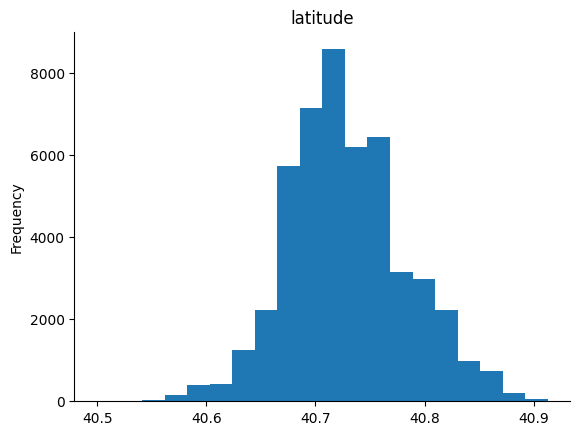

In [307]:
# @title latitude

from matplotlib import pyplot as plt
df['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Longitude Histogram Analysis:
- **Insights**: Complement the analysis of geographical distribution, helping to identify specific regions.
- **Business Hypotheses**: Identify regions with higher or lower property density based on longitude.

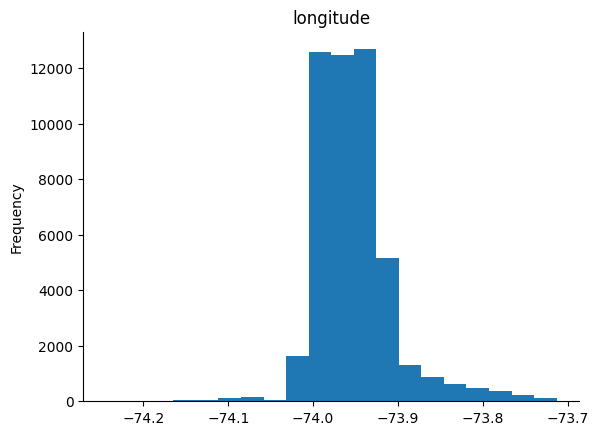

In [308]:
# @title longitude

from matplotlib import pyplot as plt
df['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Prices Frequency Visualizations

**Insights**
* **Prevalence of Low Prices:** The vast majority of listings have low prices,
suggesting that the platform is most utilized for affordable lodging options.

* **Possible Outliers:** There are some listings with exceptionally high prices that stand out from the rest of the data. These values may represent luxury properties or may be data entry errors that need to be investigated.

* **Peaks and Price Ranges:** The histogram shows a clear peak in the lowest price bin. This might indicate a popular price range or a standard lower limit for the prices of listings on the platform.

**Business Hypotheses:** Pricing Strategy: For the pricing strategy, it may be important to consider introducing competitive prices for listings within the lower price range, since this is the most saturated segment of the market.


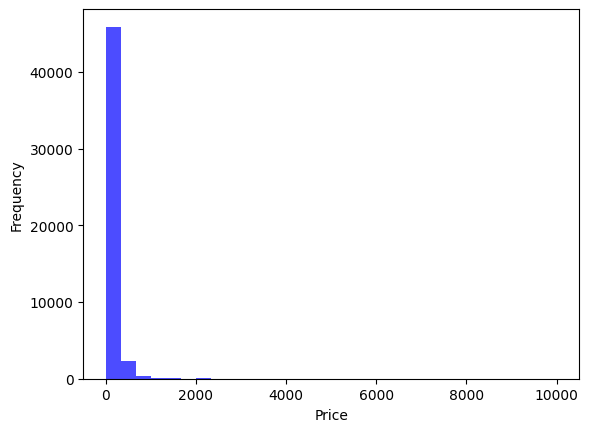

In [309]:
# @title Prices Frequency Visualizations
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## **General Insights**:

The boxplots revealed an asymmetric data distribution with the significant presence of outliers for all variables examined. Outliers suggest the existence of atypical listings, such as those with unusually high prices, a high number of reviews, extreme year-round availability, unusual minimum stay requirements, or hosts with an unusual number of listings. These anomalies could be due to luxury properties, data errors, or user behaviors not representative of the overall market trend.

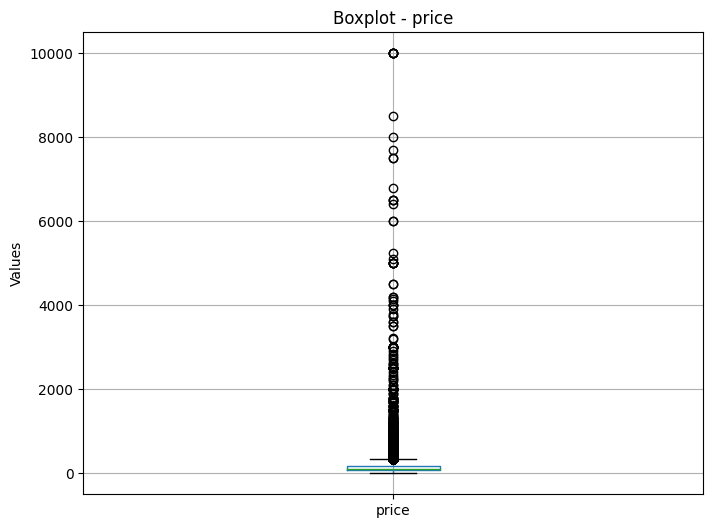

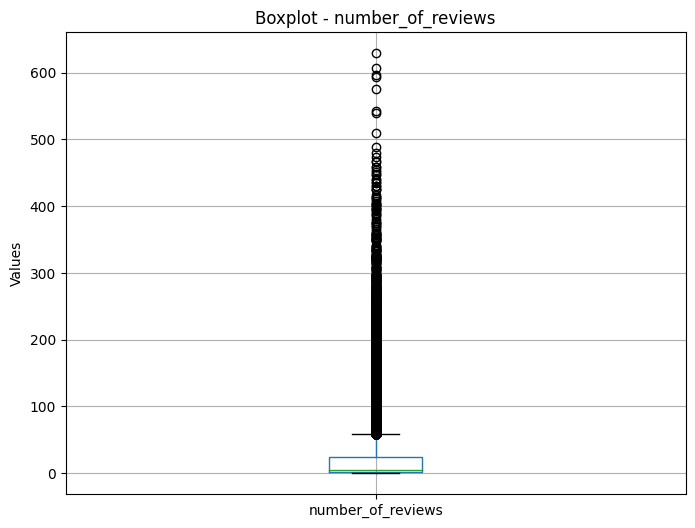

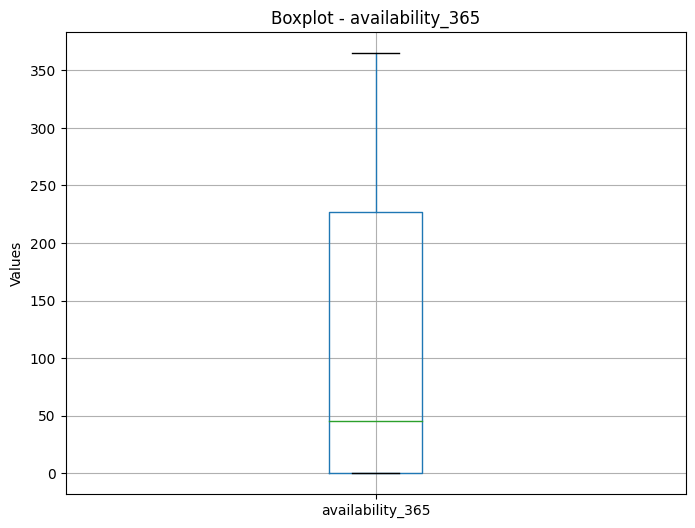

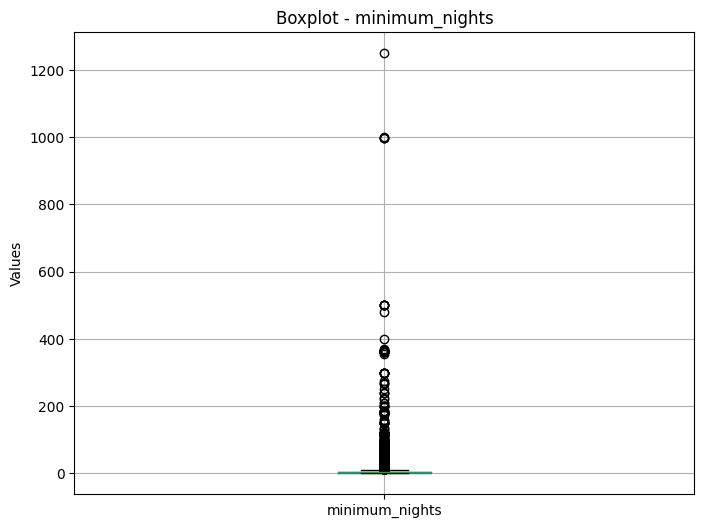

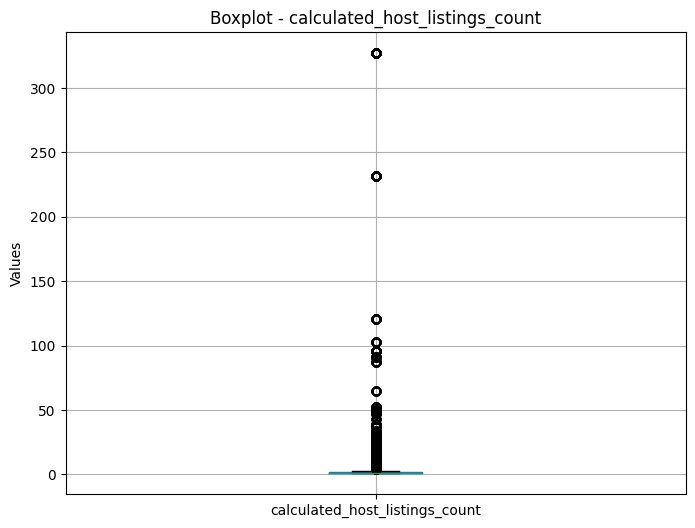

In [310]:
# @title Boxplots numerics attributes
numeric_attributes = ['price', 'number_of_reviews', 'availability_365', 'minimum_nights', 'calculated_host_listings_count']  # Add or remove attributes as needed

# Generating Boxplots
for attribute in numeric_attributes:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=attribute)
    plt.title(f'Boxplot - {attribute}')
    plt.ylabel('Values')
    plt.show()

## Variables for Outlier Treatment:

Price: Due to the high concentration of prices at the lower end and a long tail of high values, it is crucial to treat outliers in this variable to avoid distortions in the modeling.

Number_of_reviews: While a high number of reviews can be positive, outliers can indicate listings that are an exception and not representative of the overall market.

Availability_365: Outliers here could indicate listings that are never reserved or always available, which could bias the model inappropriately.

Minimum_nights and Calculated_host_listings_count: High values in these variables may represent a different than average user experience and therefore should also be addressed.

<ipython-input-311-e193305e1106>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



price                355
number_of_reviews    114
minimum_nights        30
availability_365     359
dtype: int64


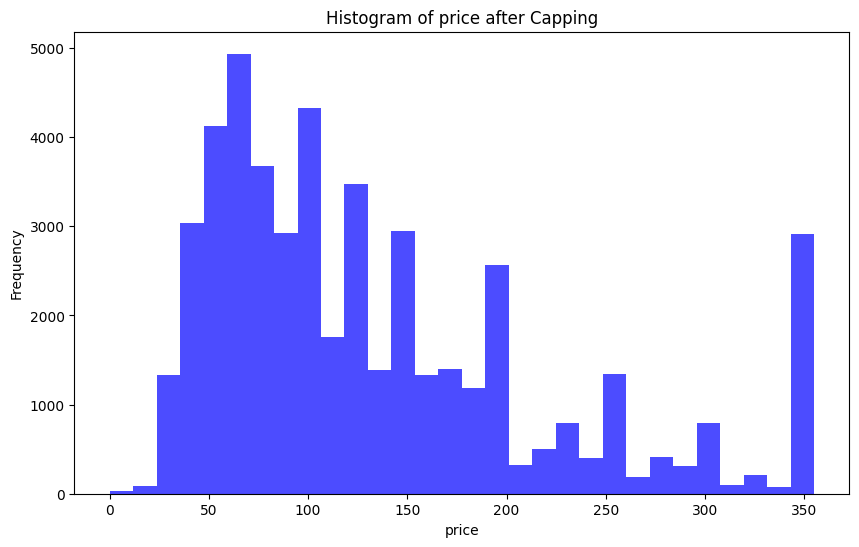

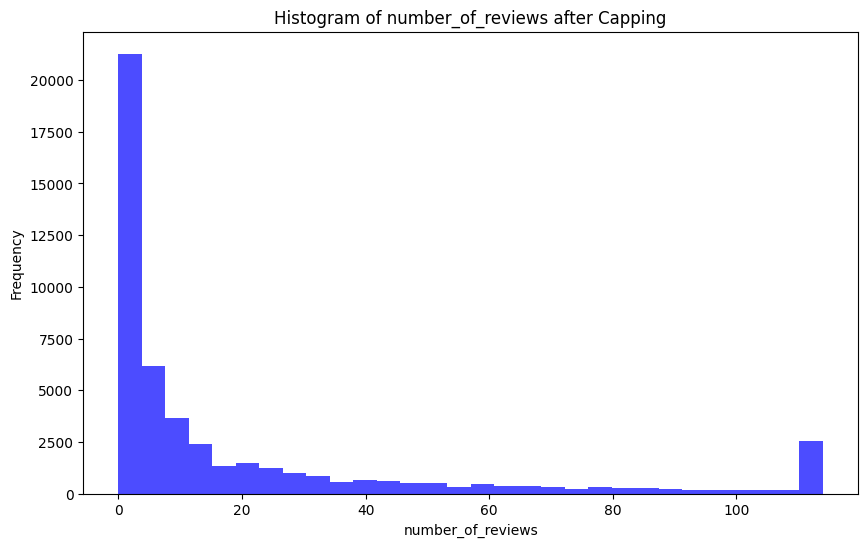

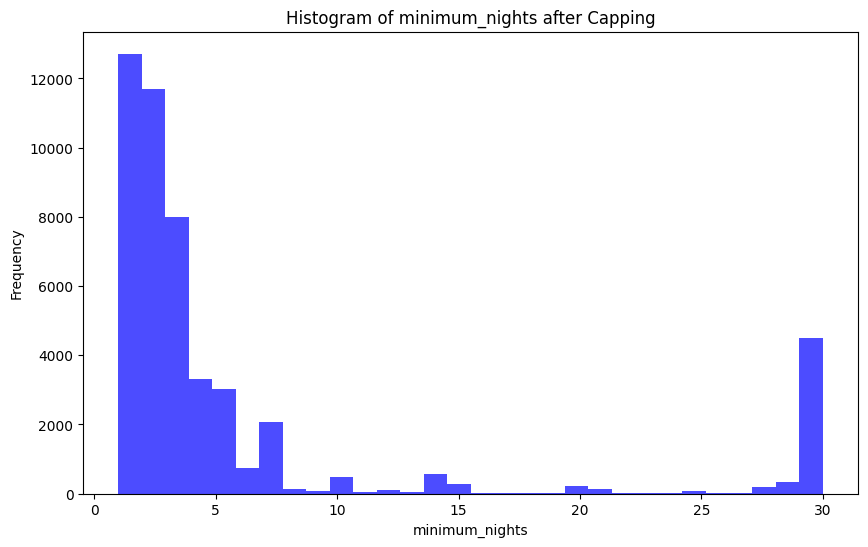

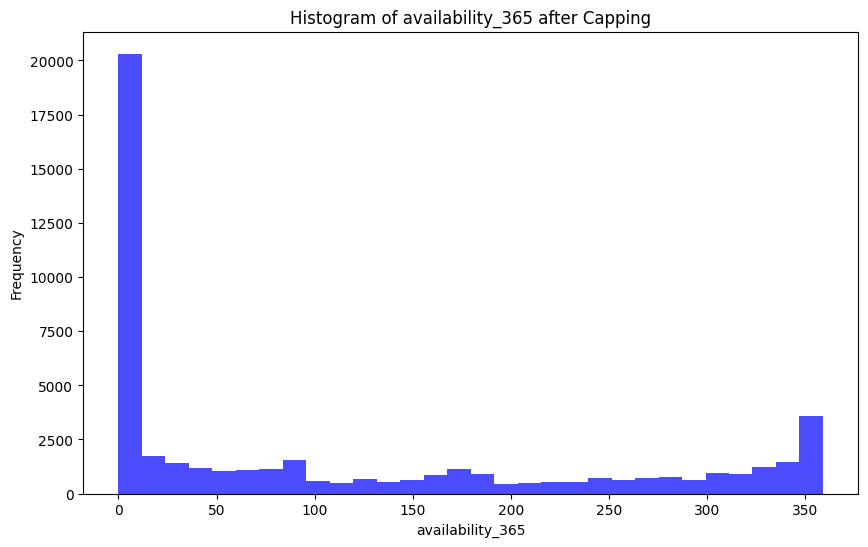

In [311]:
# @title Applying capping to the 95th percentile
percentile_95 = df.quantile(0.95)
for column in ['price', 'number_of_reviews', 'minimum_nights', 'availability_365']:
    df[column] = df[column].clip(upper=percentile_95[column])

# Check new maximum values after capping
new_max_values = df[['price', 'number_of_reviews', 'minimum_nights', 'availability_365']].max()
print(new_max_values)

variables = ['price', 'number_of_reviews', 'minimum_nights', 'availability_365']
for variable in variables:
    plt.figure(figsize=(10, 6))
    plt.hist(df[variable], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {variable} after Capping')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

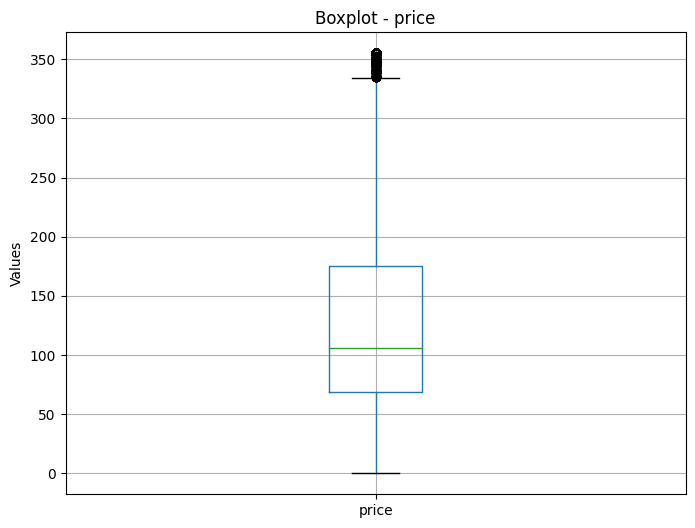

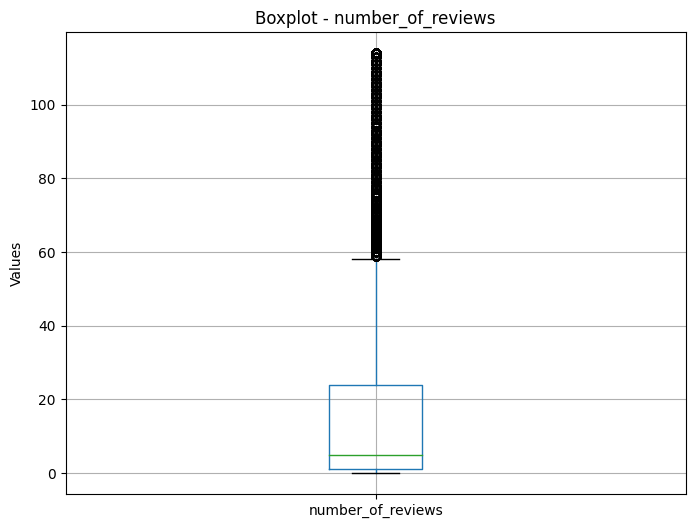

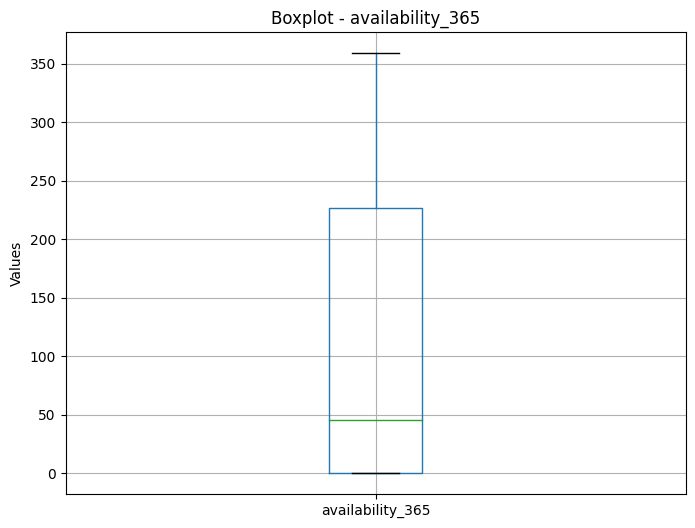

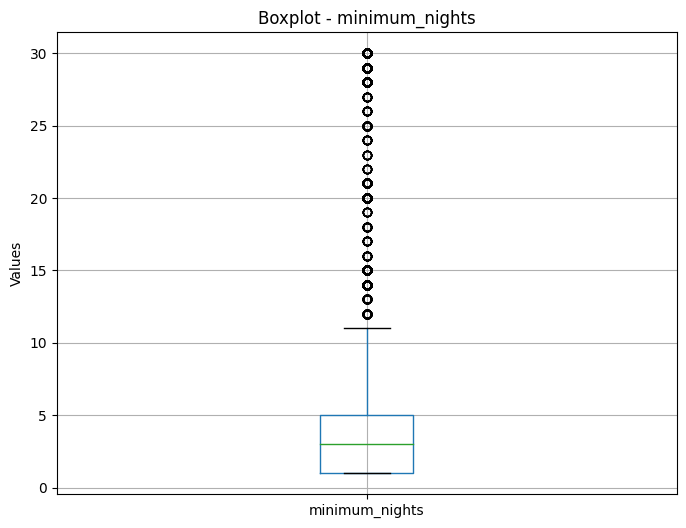

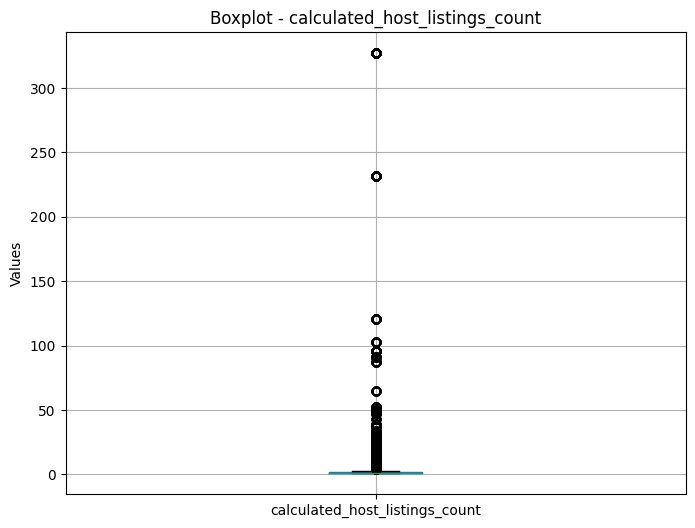

In [312]:
# @title Boxplots numerics attributes
numeric_attributes = ['price', 'number_of_reviews', 'availability_365', 'minimum_nights', 'calculated_host_listings_count']  # Add or remove attributes as needed

# Generating Boxplots
for attribute in numeric_attributes:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=attribute)
    plt.title(f'Boxplot - {attribute}')
    plt.ylabel('Values')
    plt.show()

## Price Distribution by Room Type:
- **Insights**: Predominance of lower prices, suggesting a market trend for affordable values.

<ipython-input-313-04f9ae0f8cde>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




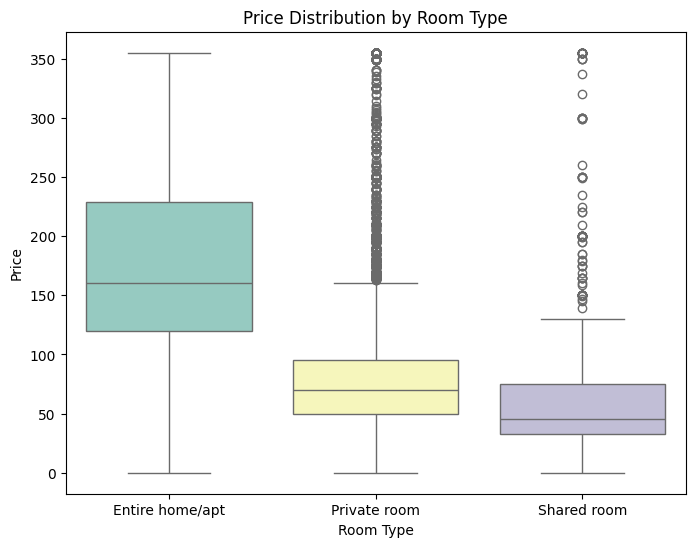

In [313]:
# Boxplot for 'room_type' in relation to 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='Set3')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

<ipython-input-314-aee59765f7d3>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




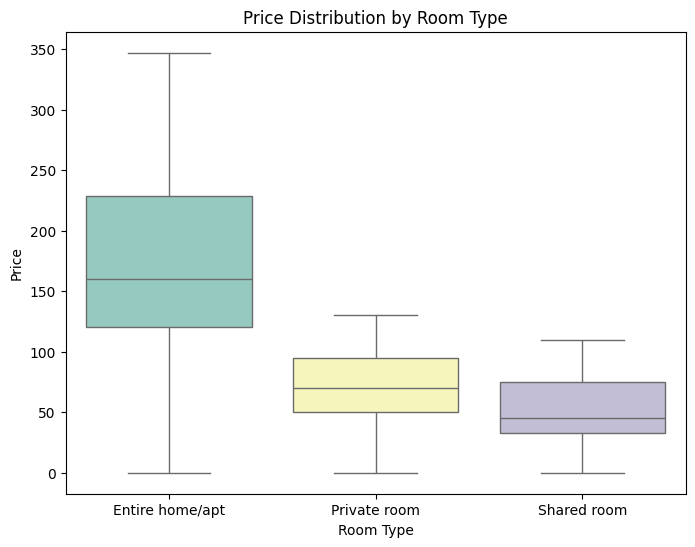

In [314]:
room_types = ['Entire home/apt','Private room', 'Shared room']

# @title Apply capping separately for each room category
for room_type in room_types:
    percentile_95 = df.loc[df['room_type'] == room_type, 'price'].quantile(0.90)
    df.loc[(df['room_type'] == room_type) & (df['price'] > percentile_95), 'price'] = percentile_95

plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='Set3')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [315]:

missing_values = df.isnull().sum()
print(missing_values)

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


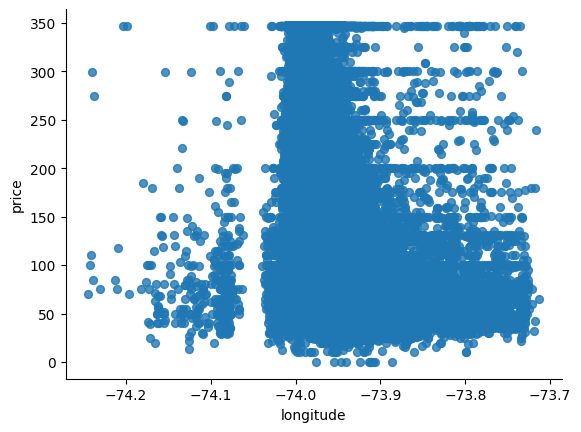

In [316]:
# @title longitude vs price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='longitude', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

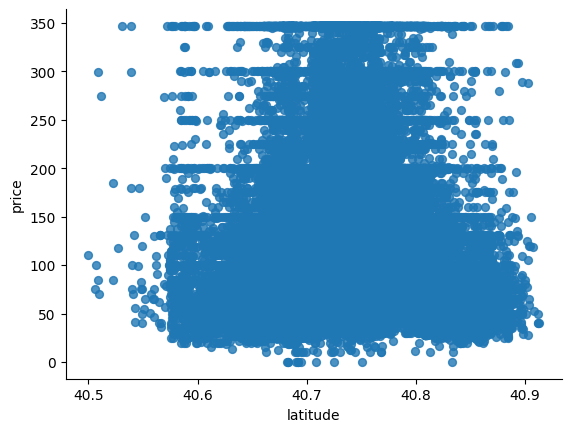

In [317]:
# @title latitude vs price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='latitude', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

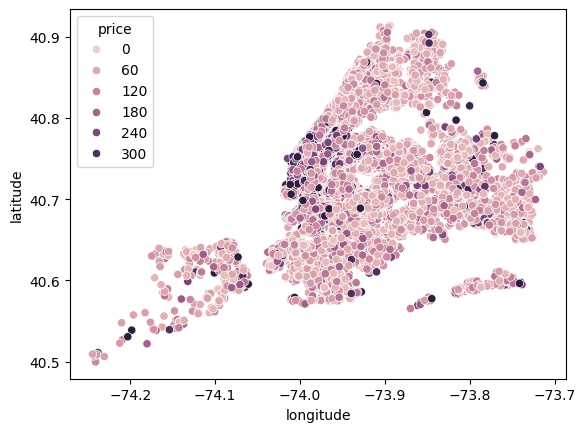

In [318]:
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df)
plt.show()

## New York Neighborhood Map

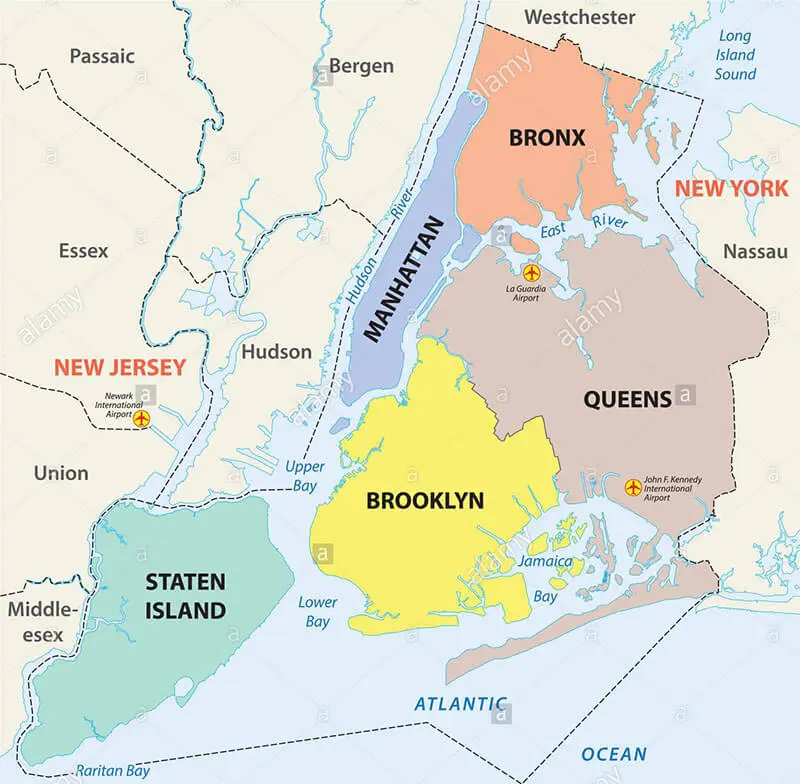

## New York Neighborhood Map (neighbourhood_group Bar Chart) Analysis:
- **Insights**: Understand the distribution of properties in different neighborhoods.
- **Business Hypotheses**: Identify strategic areas for property investment based on property availability.

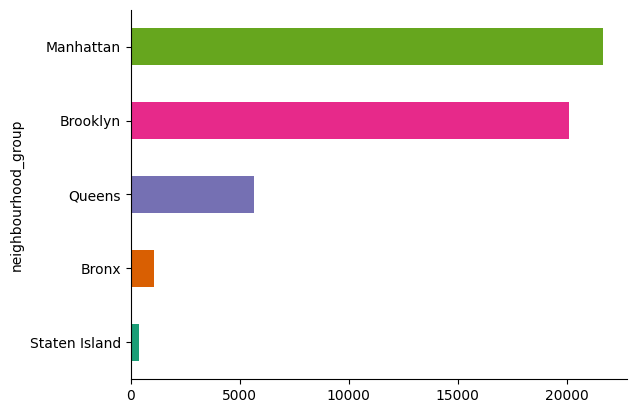

In [319]:
# @title neighbourhood_group

sorted_df = df.groupby('neighbourhood_group').size().sort_values(ascending=True)
sorted_df.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## Most Populous Neightborhoods

**Insights**: The graphs highlight neighborhoods with the highest number of listings, which may indicate popularity or high demand for short-term rentals in those locations.

**Business Hypotheses**: Neighborhoods with a high density of listings may have more competition, or require more aggressive marketing and pricing strategies.

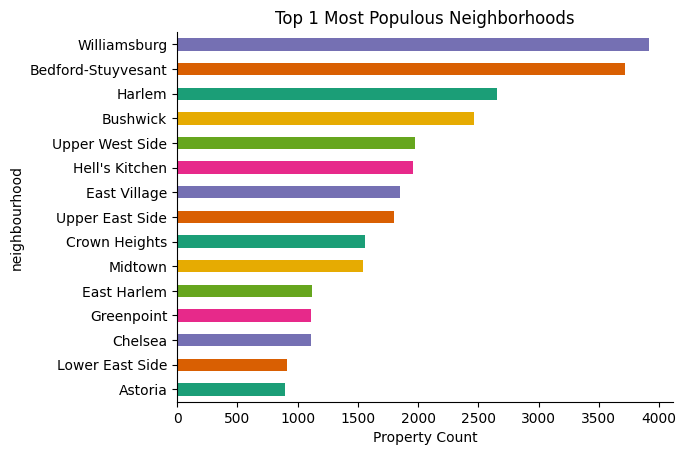

In [320]:
# @title Top 15 Most Populous Neighborhoods

top_10_neighbourhood = df['neighbourhood'].value_counts().head(15).sort_values(ascending=True)

top_10_neighbourhood.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Property Count')
plt.ylabel('neighbourhood')
plt.title('Top 1 Most Populous Neighborhoods')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## Relationship between Neighborhoods and Prices - Sorted by Price

Price Variation by Neighborhood: There is clear variation in average prices between neighborhoods, with some, like Midtown, having significantly higher average prices than others, like Bushwick.

Price as an Indicator of Demand: Neighborhoods with higher average prices may be indicative of greater demand or a perception of greater value, whether due to proximity to tourist attractions, better services or a combination of factors.

Pricing Strategy: When defining pricing strategies, it is important to consider the neighborhood's position in this price hierarchy. Neighborhoods at the top of the list may justify higher prices due to their popularity or prestige.

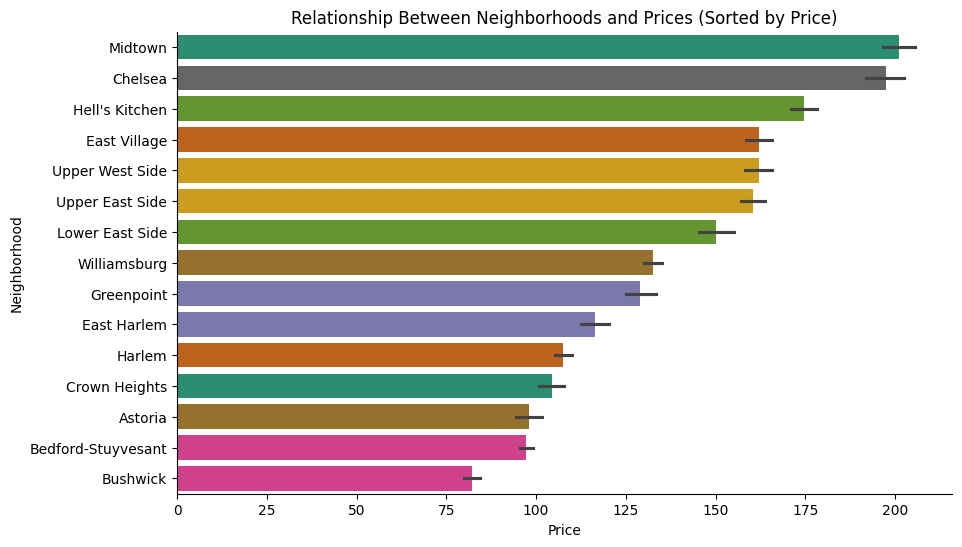

In [321]:
# @title Relationship between Neighborhoods and Prices - Sorted by Price

# Select the top 15 neighborhoods
top_15_neighborhoods = df['neighbourhood'].value_counts().head(15).sort_values(ascending=True)

# Extract relevant data for plotting
neighborhood_data = df[df['neighbourhood'].isin(top_15_neighborhoods.index)][['neighbourhood', 'price']]
12
# Sort neighborhoods by average price
sorted_neighborhoods = neighborhood_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='neighbourhood', data=neighborhood_data, order=sorted_neighborhoods, hue='neighbourhood', palette='Dark2', dodge=False, legend=False)
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.title('Relationship Between Neighborhoods and Prices (Sorted by Price)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


## Room Type Bar Chart Analysis:
- **Insights**: Explore the distribution of different room types.
- **Business Hypotheses**: Understand the popularity of specific room types and their impact on pricing.
"""


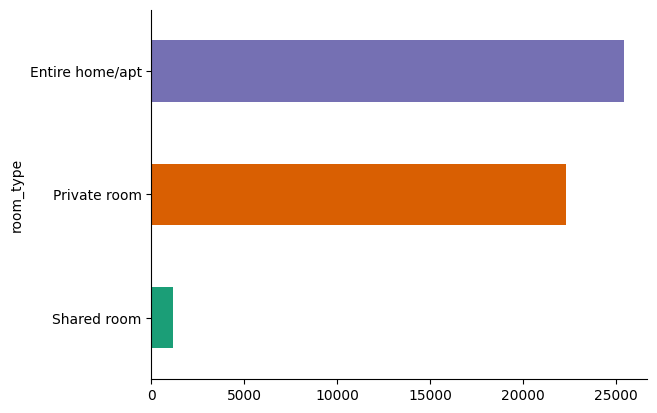

In [322]:
# @title room_type

sorted_df = df.groupby('room_type').size().sort_values(ascending=True)
sorted_df.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## Geospatial Scatterplot Analysis:
- **Insights**: Visualize the geographical distribution of prices in different regions of New York.
- **Business Hypotheses**: Identify strategic areas for differentiated pricing based on geospatial patterns.

In [323]:
# Geospatial Map
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
fig = px.scatter_mapbox(gdf, lat='latitude', lon='longitude', color='price',
                        hover_name='neighbourhood_group', hover_data=['price'], zoom=10)
fig.update_layout(mapbox_style='open-street-map', height=800)
fig.show()

## Correlation Matrix Heatmap Analysis:
- **Insights**: Identify linear relationships between numeric variables.
- **Business Hypotheses**: Understand the interdependence between different property characteristics.

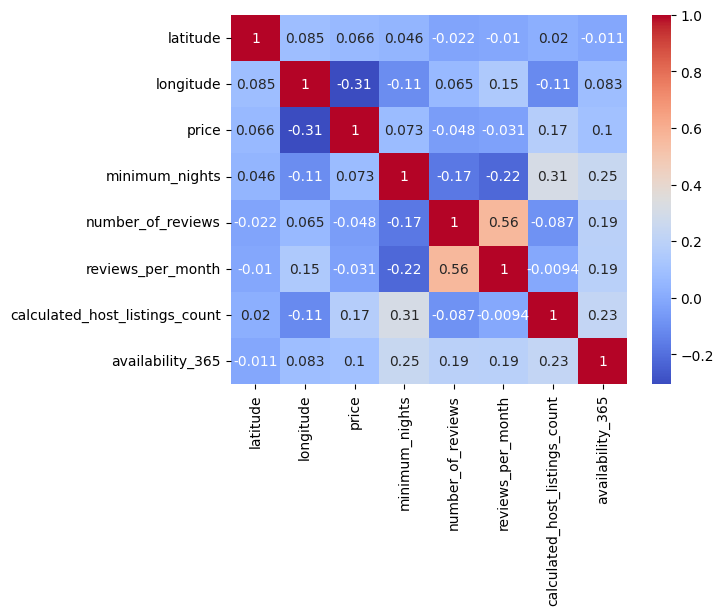

In [324]:
# Select only numeric columns for correlation matrix calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Seleção de Atributos para o Modelo:
1. **Localização (Latitude e Longitude)**: Crucial para capturar a geografia da precificação.
2. **Tipo de Quarto (Room Type)**: Influencia diretamente o preço.
3. **Disponibilidade (Disponibilidade_365)**: Indica a popularidade e demanda.
4. **Número Mínimo de Noites (Minimo_noites)**: Reflete a duração da estadia desejada pelo anfitrião.
5. **Número de Reviews (Numero_de_reviews)**: Indica a popularidade e confiabilidade da listagem.
6. **Reviews por Mês (Reviews_por_mes)**: Mostra a frequência de aluguel e atividade recente.
7. **Contagem de Listagens do Anfitrião (Calculado_host_listings_count)**: Mostra experiência do anfitrião no mercado.

## Tratamento de Dados:
- **Capping de Outliers**: Aplicar capping no percentil 95 para variáveis selecionadas.
- **Codificação de Variáveis Categóricas**: Utilizar one-hot encoding para 'room_type'.
- **Normalização ou Padronização**: Garantir que todas as variáveis sejam tratadas igualmente no modelo.

## Modelos de Machine Learning a Considerar:
1. **Regressão Linear Múltipla**: Fácil de interpretar e implementar.
2. **Regressão de Ridge ou Lasso**: Para dados com multicolinearidade e regularização.
3. **Florestas Aleatórias (Random Forests)**: Robusto para relações não-lineares e interações.
4. **Gradient Boosting Machines (GBM)**: Requer sintonia fina dos parâmetros.
5. **Support Vector Machines (SVM) com Kernel**: Para relações complexas em alta dimensão.
6. **Redes Neurais**: Para capturar relações complexas, se houver dados suficientes.

## Estratégia de Precificação Final:
- **Segmentação de Mercado**: Segmentar o mercado por localização e tipo de propriedade.
- **Precificação Dinâmica**: Ajustar preços com base em sazonalidade e demanda.
- **Análise Competitiva**: Ajustar com base nos preços de propriedades semelhantes.
- **Consideração de Feedback**: Incluir análises de reviews para ajustar preços.

Avaliar cada modelo com métricas como RMSE, MAE, e R², e basear a seleção do modelo no desempenho na validação cruzada e no conjunto de teste.


## Recomendação de Datasets Adicionais

Para enriquecer a análise e melhorar a estratégia de precificação, recomendamos a integração dos seguintes datasets adicionais:

  1. **Dados demográficos e econômicos de Nova York**: Incluir informações sobre renda média por bairro, taxa de ocupação de imóveis, e outros indicadores econômicos pode ajudar a entender a demanda e o poder aquisitivo dos potenciais inquilinos.
  2. **Dados de mobilidade urbana**: Informações sobre a proximidade e acessibilidade a transportes públicos, principais atrações turísticas e infraestrutura local podem impactar a atratividade e, consequentemente, o preço dos aluguéis.
  3. **Dados de eventos locais**: Grandes eventos podem aumentar temporariamente a demanda por aluguéis na região. Integrar um calendário de eventos pode permitir a implementação de uma precificação dinâmica.

In [325]:

missing_values = df.isnull().sum()
print(missing_values)

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [326]:
# @title Replacing the null values of reviews_per_month field by the mean of the medians of respective category
neighbourhood_medians = df.groupby('neighbourhood_group')['reviews_per_month'].transform("median")
roomtype_medians = df.groupby('room_type')['reviews_per_month'].transform("median")

medians = (neighbourhood_medians + roomtype_medians) / 2.0

df['reviews_per_month'].fillna(medians, inplace=True)

In [327]:

missing_values = df.isnull().sum()
print(missing_values)

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [328]:
# @title Adding minimum to each field to avoid anomaly of log(0)

df.minimum_nights += 0.000000001
df['minimum_nights'] = np.log10(df['minimum_nights'])
df.number_of_reviews += 0.000000001
df['number_of_reviews'] = np.log10(df['number_of_reviews'])
df.reviews_per_month += 0.000000001
df['reviews_per_month'] = np.log10(df['reviews_per_month'])
df.calculated_host_listings_count += 0.000000001
df['calculated_host_listings_count'] = np.log10(df['calculated_host_listings_count'])
df.availability_365 += 0.000000001
df['availability_365'] = np.log10(df['availability_365'])
df.price += 0.000000001
df['price'] = np.log10(df['price'])

In [329]:

missing_values = df.isnull().sum()
print(missing_values)

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [330]:
# @title Converting categoical values into numerical variables
neighbourhood_mappings = {"Brooklyn": 1, "Manhattan": 2, "Queens": 3, 'Staten Island':4, 'Bronx':5}
df['neighbourhood_group'] = df['neighbourhood_group'].map(neighbourhood_mappings)
room_mappings = {'Private room':1, 'Entire home/apt':2, 'Shared room':3}
df['room_type'] = df['room_type'].map(room_mappings)

In [331]:

missing_values = df.isnull().sum()
print(missing_values)

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [332]:
# dropping unneeded features
df.drop(['last_review', 'neighbourhood', 'latitude', 'longitude'], axis=1, inplace=True)

In [333]:

missing_values = df.isnull().sum()
print(missing_values)

name                              16
neighbourhood_group                0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


In [334]:
def remove_characters(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in word_tokenize(text) if word.lower() not in stop_words]
    return ' '.join(tokens)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    return ' '.join(lemmatized_tokens)

In [335]:
# @title Text preprocessing

df['name'].fillna('', inplace=True)
df['name'] = df['name'].apply(lambda x: x.lower())
df['name'] = df['name'].apply(lambda x: remove_stopwords(x))
df['name'] = df['name'].apply(lambda x: remove_characters(x))

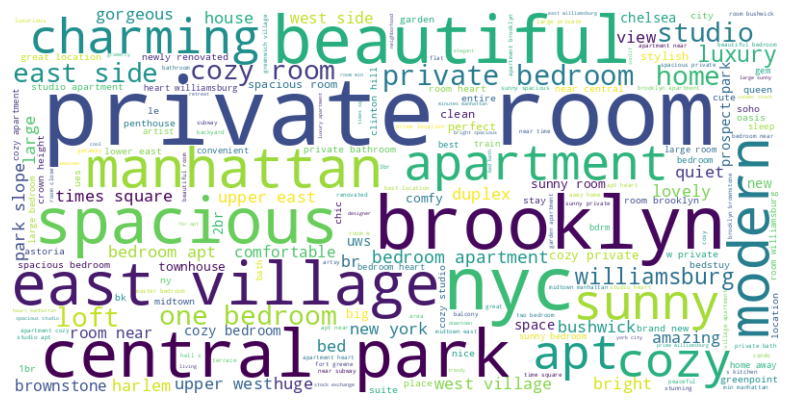

In [336]:
# wordcloud representation
corpus = ' '.join(df['name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [337]:
# @title Feature engineering
nlp = spacy.load('en_core_web_md')

df['vectors'] = df['name'].apply(lambda x:nlp(x).vector)

In [338]:
print(df.shape)

(48894, 10)


In [339]:
# @title Splitting dat into dependent and independent variables
X = df[['neighbourhood_group', 'room_type', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']]
y = df['price']

print(X.shape)
print(y.shape)

(48894, 7)
(48894,)


In [340]:
# Removendo linhas com valores nulos ou listas vazias na coluna 'vectors'
df = df.dropna(subset=['vectors'])
df = df[df['vectors'].apply(lambda x: len(x) > 0)]

# Convertendo a coluna 'vectors' em um DataFrame
vectors_df = pd.DataFrame(df['vectors'].tolist(), columns=[f'text_dim_{i}' for i in range(300)])

# Concatenando com X
X = pd.concat([X, vectors_df], axis=1)

# Reindexando y
y = y.reindex(X.index)


In [341]:
X.head(-32)

neighbourhood_group  room_type  minimum_nights  number_of_reviews  \
0                        2          2    4.342945e-10           1.653213   
1                        2          1    4.771213e-01          -9.000000   
2                        1          2    4.342945e-10           2.056905   
3                        2          2    1.000000e+00           0.954243   
4                        2          2    4.771213e-01           1.869232   
...                    ...        ...             ...                ...   
48857                    3          1    4.771213e-01          -9.000000   
48858                    2          1    8.450980e-01          -9.000000   
48859                    2          2    4.342945e-10          -9.000000   
48860                    2          2    4.342945e-10          -9.000000   
48861                    1          1    4.342945e-10          -9.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0              -0.420216                    3.010300e-01      2.550228e+00   
1              -0.161151                    4.342945e-10      2.555094e+00   
2               0.666518                    4.342945e-10      2.287802e+00   
3              -1.000000                    4.342945e-10     -9.000000e+00   
4              -0.229148                    4.342945e-10      2.110590e+00   
...                  ...                             ...               ...   
48857          -0.004365                    6.020600e-01      2.555094e+00   
48858          -0.161151                    4.342945e-10      2.238046e+00   
48859          -0.197226                    4.342945e-10      1.477121e+00   
48860          -0.197226                    4.342945e-10      4.342945e-10   
48861          -0.145694                    4.342945e-10      1.919078e+00   

       text_dim_0  text_dim_1  text_dim_2  ...  text_dim_290  text_dim_291  \
0        0.255460   -0.490633   -2.114383  ...     -3.017833      0.834002   
1       -0.159346   -0.578078   -0.767270  ...      0.102800      1.838256   
2       -1.035850    0.548938   -3.602550  ...     -0.633273      0.380543   
3       -1.040341    2.342571   -2.454900  ...     -2.402460      0.340506   
4       -1.384974   -1.952040   -0.016714  ...     -2.909147      1.736703   
...           ...         ...         ...  ...           ...           ...   
48857    0.534411    1.218244   -1.749800  ...     -0.979489     -0.495454   
48858   -1.909286   -0.028171   -1.237590  ...      2.161529     -1.357372   
48859    0.000000    0.000000    0.000000  ...      0.000000      0.000000   
48860   -2.366883    1.000889   -2.289426  ...     -2.389011     -0.953040   
48861   -0.183844    1.116064   -3.189588  ...     -2.825220     -0.089508   

       text_dim_292  text_dim_293  text_dim_294  text_dim_295  text_dim_296  \
0          2.386033      2.980500      0.718530      2.660797     -2.294565   
1          0.214127      0.761944     -1.145640      0.133800     -0.796514   
2          1.274905      1.294852     -2.266935      3.091162     -2.189317   
3          1.384471      0.934267      0.637694      0.920904     -2.118228   
4          0.428203      1.277404     -0.670864      2.553935      0.559469   
...             ...           ...           ...           ...           ...   
48857      0.176443      0.053556     -1.066489      0.388813     -0.995866   
48858      0.644651     -2.231721     -1.637224     -2.667663      0.660543   
48859      0.000000      0.000000      0.000000      0.000000      0.000000   
48860      0.492233      0.582653     -0.731088      2.780756     -1.487660   
48861      1.849346      0.179250     -3.309623     -0.719033     -3.306948   

       text_dim_297  text_dim_298  text_dim_299  
0          0.881977      0.001093      0.845293  
1         -1.099194     -1.999304      0.470840  
2          1.236675      0.014398      0.478725  
3          0.311579     -1.699134      0.556487  
4         -1.431483  

In [342]:
y.head()

0    2.352183
1    2.115943
2    1.949390
3    1.903090
4    2.301030
Name: price, dtype: float64

In [343]:
print(X.shape)
print(y.shape)

(48894, 307)
(48894,)


In [344]:
y.head()

0    2.352183
1    2.115943
2    1.949390
3    1.903090
4    2.301030
Name: price, dtype: float64

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [358]:
# Treinamento do modelo
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Previsões
y_pred_ridge = ridge_model.predict(X_test)

# Avaliação do modelo
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Resultados
print(f"Ridge Regression MSE: {ridge_mse}, R2: {ridge_r2}")


Ridge Regression MSE: 0.06397263338895368, R2: 0.3449609676259575


In [359]:
# Treinamento do modelo
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Previsões
y_pred_lasso = lasso_model.predict(X_test)

# Avaliação do modelo
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Resultados
print(f"Lasso Regression MSE: {lasso_mse}, R2: {lasso_r2}")


Lasso Regression MSE: 0.09354951921812285, R2: 0.04211248933395906


In [360]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Treinamento do modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, verbose=2)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliação do modelo
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Resultados
print(f"Random Forest MSE: {rf_mse}, R2: {rf_r2}")


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 11.3min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


Random Forest MSE: 0.05343519338782523, R2: 0.4528576436947992


Agora vamos ver o resultado dos modelos com os Hiperparametros otimizados e com validação cruzada.

In [ ]:
# Para Ridge
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Para Lasso
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}

# Para Random Forest
rf_params = {
    'n_estimators': [100],  # Reduzindo para 1 opção
    'max_depth': [10, None],  # Reduzindo para 2 opções
    'min_samples_split': [2],  # Mantendo 1 opção
    'min_samples_leaf': [1]  # Mantendo 1 opção
}


# Exemplo para o modelo Ridge
ridge_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error', verbose=1)
ridge_search.fit(X_train, y_train)

# Exemplo de validação cruzada para o modelo Ridge com os melhores hiperparâmetros
best_ridge = Ridge(**ridge_search.best_params_)
cv_scores_ridge = cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Melhores parâmetros e score para Ridge
print("Melhores parâmetros para Ridge:", ridge_search.best_params_)
print("Melhor score para Ridge:", ridge_search.best_score_)
print("CV MSE para Ridge:", -cv_scores_ridge.mean())

# Otimização de hiperparâmetros com GridSearchCV para Lasso
lasso_search = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error', verbose=1)
lasso_search.fit(X_train, y_train)

# Exemplo de validação cruzada para o modelo Lasso com os melhores hiperparâmetros
best_lasso = Lasso(max_iter=10000, **lasso_search.best_params_)
cv_scores_lasso = cross_val_score(best_lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Melhores parâmetros e score para Lasso
print("Melhores parâmetros para Lasso:", lasso_search.best_params_)
print("Melhor score para Lasso:", lasso_search.best_score_)
print("CV MSE para Lasso:", -cv_scores_lasso.mean())

# Otimização de hiperparâmetros com GridSearchCV para Random Forest
rf_search = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='neg_mean_squared_error', verbose=1)
rf_search.fit(X_train, y_train)

# Exemplo de validação cruzada para o modelo Random Forest com os melhores hiperparâmetros
best_rf = RandomForestRegressor(**rf_search.best_params_)
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Melhores parâmetros e score para Random Forest
print("Melhores parâmetros para Random Forest:", rf_search.best_params_)
print("Melhor score para Random Forest:", rf_search.best_score_)
print("CV MSE para Random Forest", -cv_scores_rf.mean())


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores parâmetros para Ridge: {'alpha': 100.0}
Melhor score para Ridge: -0.06593192471109903
CV MSE para Ridge: 0.06593192471109903
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Otimização de hiperparâmetros com GridSearchCV para GBM
gbm_search = GridSearchCV(GradientBoostingRegressor(), gbm_params, cv=5, scoring='neg_mean_squared_error', verbose=1)
gbm_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e score para GBM
print("Melhores parâmetros para GBM:", gbm_search.best_params_)
print("Melhor score para GBM:", gbm_search.best_score_)

In [ ]:
from sklearn.svm import SVR

# Definir o espaço de hiperparâmetros para SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Otimização de hiperparâmetros com GridSearchCV para SVM
svm_search = GridSearchCV(SVR(), svm_params, cv=5, scoring='neg_mean_squared_error', verbose=1)
svm_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e score para SVM
print("Melhores parâmetros para SVM:", svm_search.best_params_)
print("Melhor score para SVM:", svm_search.best_score_)

In [ ]:
pip install scikeras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

# Definir uma função para criar o modelo de rede neural
def create_nn_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Criar um modelo KerasRegressor para validação cruzada
nn_model = KerasRegressor(model=create_nn_model, epochs=100, batch_size=10, verbose=0)

# Executar validação cruzada
cv_scores_nn = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Exibir o MSE médio da validação cruzada para a rede neural
print("CV MSE para Redes Neurais:", -cv_scores_nn.mean())
